# Newton's Method for Rosenbrock Function, Lagrange Multipliers, Eigenmodes
Dec. 2019

## 1a)


The code below minimizes Rosenbrock's function using steepest descent:


In [579]:
import numpy as np
import scipy.optimize

In [580]:
def Rosenbrock_func(x_vec):
    return scipy.optimize.rosen(x_vec)

def Rosenbrock_Jacobian(x_vec):
    x, y = x_vec[0], x_vec[1]
    
    J_x = -400*x*(y - x**2) - 2*(1 - x)
    J_y = 200*(y - x**2)
    return np.array([J_x, J_y])

    

In [581]:
def steepest_descent(initial_guess_vector, tol, max_iters):
    
    # initialize iteration counter and x_vec
    iters = 0
    x_vec = initial_guess_vector
    path_list = []
    path_list.append(x_vec)
    
    # run for loop until a terminating condition is hit

    for iters in range(max_iters):
        s_k = - Rosenbrock_Jacobian(x_vec)
        eta_fn = scipy.optimize.line_search(Rosenbrock_func, Rosenbrock_Jacobian, x_vec, s_k)
        eta = eta_fn[0]
        
        x_new = x_vec + (eta * s_k)
        path_list.append(x_new)
        
        if np.linalg.norm(x_new - x_vec) <= tol:
            print("Converged! Number of iterations:", iters)
            return x_new, path_list
        
        # update
        x_vec = x_new
        iters += 1
        
    print("Failed to converge. Number of iterations:", iters)
    return x_vec, path_list

Before implementing steepest descent -- and so we can have a more intuitive sense of the optimization path it produces -- it is useful to plot a 3D shape of the Rosenbrock function. We have it here:

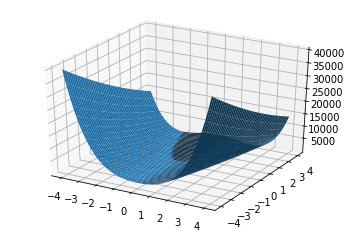

In [582]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')

XM, YM = np.mgrid[-4:4:50j,-4:4:50j]
FM = Rosenbrock_func(np.array([XM, YM]))
ax.plot_surface(XM, YM, FM)

Now we implement steepest descent for our three initial points, and plot the optimization path against the contours of Rosenbrock's function afterward.

In [583]:
first_guess = np.array([-1, 1])
first_result, path_list = steepest_descent(first_guess, 10**(-8), max_iters=100)
print(first_result)

Converged! Number of iterations: 1
[1. 1.]


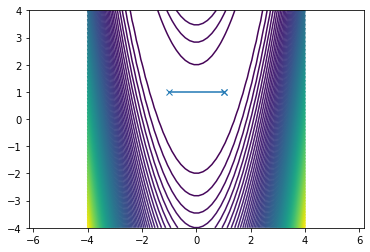

In [584]:
plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.plot(it_array.T[0], it_array.T[1], "x-")

From a starting point of $[-1, 1]^T$ it converges to $[1, 1]^T$ in 1 iteration.

In [585]:
second_guess = np.array([0, 1])
second_result, path_list = steepest_descent(second_guess, 10**(-8), max_iters=2000)
print(second_result)

Converged! Number of iterations: 1570
[0.99999957 0.99999913]


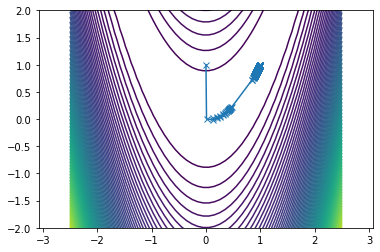

In [586]:
XM, YM = np.mgrid[-2.5:2.5:50j,-2.5:2.5:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.plot(it_array.T[0], it_array.T[1], "x-")

From a starting point of $[0, 1]^T$ it converges very close to $[1, 1]^T$ in 1570 iterations.

In [587]:
third_guess = np.array([2, 1])
third_result, path_list = steepest_descent(third_guess, 10**(-8), max_iters=2000)
print(third_result)

Failed to converge. Number of iterations: 2000
[1.1657344  1.35997963]


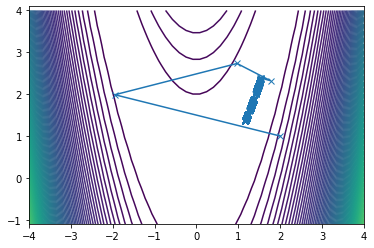

In [588]:
XM, YM = np.mgrid[-4:4:50j,-4:4:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(0, 3)
plt.xlim(-4, 4)
plt.plot(it_array.T[0], it_array.T[1], "x-")

From a starting point of $[2, 1]^T$ it fails to converge over 2000 iterations. The point it ends up at is about $[1.166, 1.360]^T$.

## 1b)

We now repeat part (a), but with Newton's method (without line search).

In [589]:
def Rosenbrock_Hessian(x_vec):
    x, y = x_vec[0], x_vec[1]
    
    dJx_dx = 400*(3*x**2 - y) + 2
    dJx_dy = -400*x
    dJy_dx = -400*x
    dJy_dy = 200
    
    Hessian = np.zeros((2,2))
    Hessian[0,0] = dJx_dx
    Hessian[0,1] = dJx_dy
    Hessian[1,0] = dJy_dx
    Hessian[1,1] = dJy_dy
    
    return Hessian

def newtons_method(initial_guess_vector, tol, max_iters):
    
    # initialize
    iters = 0
    x_vec = initial_guess_vector
    path_list = []
    path_list.append(x_vec)
    
    for iters in range(max_iters):
        J = Rosenbrock_Jacobian(x_vec)
        H = Rosenbrock_Hessian(x_vec)

        delta = np.linalg.solve(H, J)
        
        x_new = x_vec - delta
        path_list.append(x_new)
        
        if np.linalg.norm(x_new - x_vec) <= tol:
            print("Converged! Number of iterations:", iters)
            return x_new, path_list
        
        # update
        x_vec = x_new
        iters += 1
        
    print("Failed to converge. Number of iterations:", iters)
    return x_vec, path_list


In [590]:
first_guess = np.array([-1, 1])
newton_first_result, path_list = newtons_method(first_guess, 10**(-8), max_iters=2000)
print(newton_first_result)

Converged! Number of iterations: 2
[1. 1.]


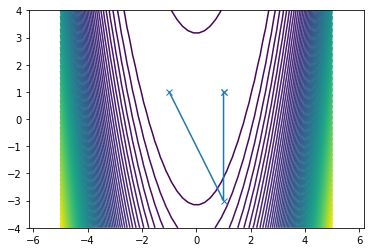

In [591]:
XM, YM = np.mgrid[-5:5:50j,-4:4:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-4, 4)
plt.xlim(-2, 2)
plt.plot(it_array.T[0], it_array.T[1], "x-")

From a starting point of $[-1, 1]^T$ it converges to $[1, 1]^T$ in 2 iterations.

In [592]:
second_guess = np.array([0, 1])
newton_second_result, path_list = newtons_method(second_guess, 10**(-8), max_iters=2000)
print(newton_second_result)

Converged! Number of iterations: 5
[1. 1.]


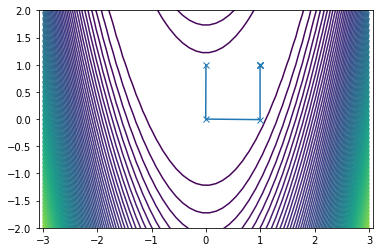

In [593]:
XM, YM = np.mgrid[-3:3:50j,-3:3:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.plot(it_array.T[0], it_array.T[1], "x-")

From a starting point of $[0, 1]^T$ it converges to $[1, 1]^T$ in 5 iterations.

In [594]:
third_guess = np.array([2, 1])
newton_third_result, path_list = newtons_method(third_guess, 10**(-8), max_iters=2000)
print(newton_third_result)

Converged! Number of iterations: 5
[1. 1.]


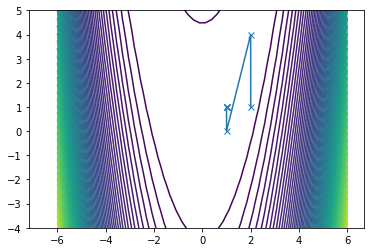

In [595]:
XM, YM = np.mgrid[-6:6:50j,-6:6:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-4, 5)
plt.xlim(-0.5, 0)
plt.plot(it_array.T[0], it_array.T[1], "x-")

From a starting point of $[2, 1]^T$ it converges to $[1, 1]^T$ in 5 iterations.

## 1c)
Now we repeat part (a), but with BFGS. 

In [602]:
def BFGS(initial_guess_vector, tol, max_iters):
    
    # initialize
    iters = 0
    x_k = initial_guess_vector
    path_list = []
    path_list.append(x_k)
    
    # initialize Hessian to the identity matrix
    B_k = np.eye(2)
        
    for iters in range(max_iters):
        grad_f = - Rosenbrock_Jacobian(x_k)
        s_k = np.linalg.solve(B_k, grad_f)
        x_knew = x_k + s_k
        path_list.append(x_knew)
        y_k = Rosenbrock_Jacobian(x_knew) - Rosenbrock_Jacobian(x_k)
        
        delta_b = (np.outer(y_k, y_k.T) / np.dot(y_k.T, s_k)) - (np.dot(np.outer(np.dot(B_k, s_k), s_k.T), B_k) / (np.dot(np.dot(s_k.T, B_k), s_k)))
        
        B_knew = B_k + delta_b
        
        if np.linalg.norm(x_knew - x_k) <= tol:
            print("Converged! Number of iterations:", iters)
            return x_knew, path_list
        
        # update
        x_k = x_knew
        B_k = B_knew
        iters += 1
        
    print("Failed to converge. Number of iterations:", iters)
    return x_knew, path_list
    

In [603]:
first_guess = np.array([-1, 1])
BFGS_first_result, path_list = BFGS(first_guess, 10**(-8), max_iters=2000)
print(BFGS_first_result)

Converged! Number of iterations: 123
[1. 1.]


From a starting point of $[-1, 1]^T$ it converges to $[1, 1]^T$ in 123 iterations.

We can see a zoomed-out graph below, followed by a zoomed-in plot:

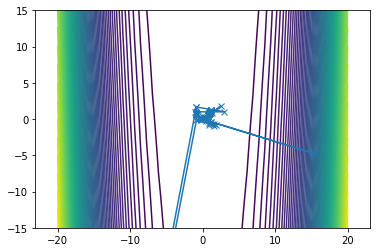

In [604]:
XM, YM = np.mgrid[-20:20:50j,-20:20:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-15, 15)
plt.xlim(-20, 20)
plt.plot(it_array.T[0], it_array.T[1], "x-")

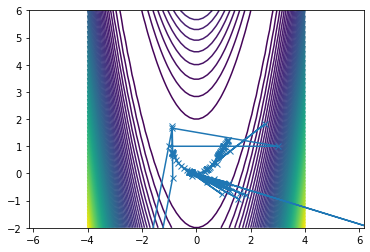

In [605]:
XM, YM = np.mgrid[-4:4:50j,-2:6:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-2, 6)
plt.xlim(-2, 2)
plt.plot(it_array.T[0], it_array.T[1], "x-")

In [606]:
second_guess = np.array([0, 1])
BFGS_second_result, path_list = BFGS(second_guess, 10**(-8), max_iters=2000)
print(BFGS_second_result)

Converged! Number of iterations: 37
[1. 1.]


From a starting point of $[0, 1]^T$ it converges to $[1, 1]^T$ in 37 iterations.

We can see a zoomed-out graph below, followed by a zoomed-in plot:

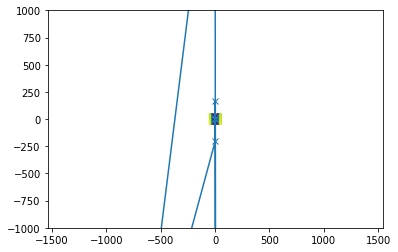

In [607]:
XM, YM = np.mgrid[-50:50:50j,-50:50:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-1000, 1000)
plt.xlim(-30, 30)
plt.plot(it_array.T[0], it_array.T[1], "x-")

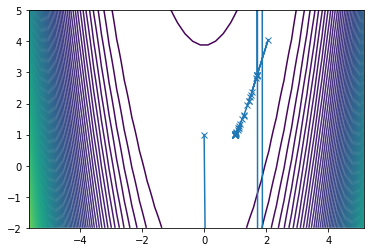

In [608]:
XM, YM = np.mgrid[-6:6:50j,-2:6:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-2, 5)
plt.xlim(-0.5, 0)
plt.plot(it_array.T[0], it_array.T[1], "x-")

In [609]:
third_guess = np.array([2, 1])
BFGS_third_result, path_list = BFGS(third_guess, 10**(-8), max_iters=2000)
print(BFGS_third_result)

Converged! Number of iterations: 44
[1. 1.]


From a starting point of $[2, 1]^T$ it converges to $[1, 1]^T$ in 44 iterations.

We can see a zoomed-out graph below, followed by a zoomed-in plot:

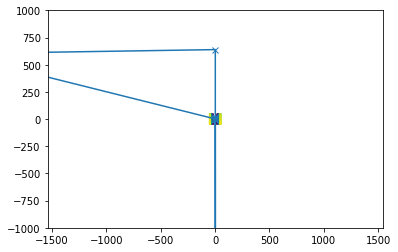

In [610]:
XM, YM = np.mgrid[-50:50:50j,-50:50:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-1000, 1000)
plt.xlim(-30, 30)
plt.plot(it_array.T[0], it_array.T[1], "x-")

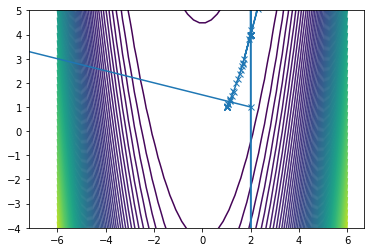

In [611]:
XM, YM = np.mgrid[-6:6:50j,-6:6:50j]
FM = Rosenbrock_func(np.array([XM, YM]))

plt.axis("equal")
plt.contour(XM, YM, FM, 100)
it_array = np.array(path_list)
plt.ylim(-4, 5)
plt.xlim(-0.5, 0)
plt.plot(it_array.T[0], it_array.T[1], "x-")

## 2a)

First, let's evaluate $ \frac{d\mathcal{L}}{d\lambda}$:

We have that $\mathcal{L}(b, \lambda) = T + \lambda(I - R)$. Rearrange this to produce:

$\mathcal{L}(b, \lambda) = T + \lambda I - \lambda R$



We can include a dummy variable $g(x) = \sqrt{1 + (\frac{dy}{dx})^2}$, and expand the terms using the definitions given in the problem statement to write:

$$\mathcal{L}(b, \lambda) = \int_0^L\rho y^2\omega^2gdx + \lambda\int_0^Lgdx - \lambda R$$

Recall we are given that $y(x) = \sum_{k=1}^{20} b_k sin\frac{\pi k x}{L}$. Later we will need $\frac{dy}{dx}$; for now it is enough to note that $\frac{dy}{dx} = \frac{\pi}{L} \sum_{k=1}^{20} k b_k cos\frac{\pi k x}{L}$.

Factor out the $g$ to produce:
$\mathcal{L}(b, \lambda) = \int_0^L g(\rho y^2\omega^2 + \lambda)dx - \lambda R$

So we now take the derivative of this with respect to $\lambda$, which gives us our result for this first part:

$$ \frac{d\mathcal{L}}{d\lambda} = \int_0^L gdx - R$$ where $g = \sqrt{1 + (\frac{dy}{dx})^2}$

Note that this is the same as $\frac{d\mathcal{L}}{d\lambda} = I - R$.

Now, we turn to the more difficult task: finding $\triangledown_b \mathcal{L}$. 


Recall from just above that we know:

$\mathcal{L}(b, \lambda) = \int_0^L\rho y^2\omega^2gdx + \lambda\int_0^Lgdx - \lambda R$

Recognizing that $\triangledown_b \mathcal{L}$ is a gradient vector where each component is $\frac{d\mathcal{L}}{db_k}$, we seek to find the derivative of $\mathcal{L}$ with respect to each $b_k$. Later, we can reconstruct the gradient by filling in for each $k$ value in a column vector. 

So we first note that the terms with $b_k$ dependency are $g$ and $y$ (so $\lambda R$ does not have $b_k$ dependency, and thus disappears). Taking the derivative -- and using the product and chain rules -- gives us the result:

$$\frac{d\mathcal{L}}{db_k} = \int_0^L \left( (\frac{dg}{db_k}) \rho y^2 \omega^2 + 2 g \rho y (\frac{dy}{db_k}) \omega^2 + \frac{dg}{db_k} \lambda \right)  dx$$

where 

$$\frac{dg}{db_k} = \frac{\pi}{L} \frac{k cos \frac{ \pi k x}{L}}{g} \frac{dy}{dx} = \frac{\pi \frac{dy}{dx} k cos\frac{\pi k x}{L}}{gL}$$ 

and 

$$ \frac{dy}{db_k} = sin \frac{\pi k x}{L}$$

Thus we plug in values for $k$ from 1 to 20 and we have:

$$
  \begin{align}
    \triangledown_b \mathcal{L} &= \begin{bmatrix}
           \frac{d\mathcal{L}}{db_1} \\
           \frac{d\mathcal{L}}{db_2} \\
           \vdots \\
           \frac{d\mathcal{L}}{db_{20}}
         \end{bmatrix}
  \end{align}
$$

## 2b)
The code below finds the stationary points of $\mathcal{L}$, and plots the initial guess for $y(x)$ and the optimized solution for $y(x)$. We begin with our composite trapezoid function:

In [612]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

# Define composite trapezoid rule
def comp_trap(func, start, end, pts):
    
    #initialize list
    x_list = []
    h = (end-start)/pts
    
    for i in range(pts+1):
        x_list.append(start + i*h)
    I = 0
    for i in range(pts):
        I += h * 0.5 * (func(x_list[i]) + func(x_list[i+1]))
    return I

# Define global variables for use in functions:
rho = 1
R = 3
om = 1
L = 1

Now we define all the functions that we'll use:

In [574]:
# To atomize the code (for easier debugging)
# I break down the long dL/dbk eqn from above to include functions 
# that evaluate the derivative of I and T with respect to bk
def Lagrangian_grad(vec):
    target = np.zeros(21)
    
    lam = vec[-1]
    b_k = vec[:-1]
    
    for k in range(1, 21):
        
        di_dbk_res = dI_dbk(k)
        res_i = lam * di_dbk_res(b_k)
        
        dt_dbk_res = dT_dbk(k)
        res_t = dt_dbk_res(b_k)
        
        target[k-1] = res_i + res_t
    target[20] = -R + I(b_k)
    return target

def g(x, b):
    return np.sqrt(1 + (dy_dx(x, b))**2)

def dg_dbk(x, b, k):
    return 1/g(x, b) * dy_dx(x, b) * dyprime_dbk(x, k)

def I(b):
    func = lambda x: g(x,b)
    return comp_trap(func, 0, L, 251)

def dI_dbk(k):
    def inner(b):
        innermost = lambda x: (dy_dx(x, b))/g(x, b) * dyprime_dbk(x, k)
        return comp_trap(innermost, 0, L, 251)
    return inner

def dT_dbk(k):
    def inner(b):
        def innermost(x):
            first_term = dg_dbk(x, b, k) * rho * y(x, b)**2 * om**2
            second_term = 2 * g(x, b) * rho * y(x, b) * dy_dbk(x, k) * om**2
            total = first_term + second_term
            return  total
        return comp_trap(innermost, 0, L, 251)
    return inner

# we also need to handle y and all its variations
def y(x, b):
    k = np.array(range(1, 21))
    global L
    return np.sum(b * (np.sin(np.pi * k * x / L)))

def dy_dbk(x, k):
    return np.sin(np.pi * k * x / L)

def dy_dx(x, b):
    k = np.array(range(1, 21))
    global L
    return np.sum(b * k * np.pi/L * (np.cos(np.pi * k * x / L)))

def dyprime_dbk(x, k):
    return np.pi * (k / L) *  np.cos(np.pi * k * x / L)

So we can combine the above to get our answer for 2(b):

Output and graph for P2b:
[ 1.44289102e+00  2.40377634e-12  1.00094880e-01  6.55303718e-13
  7.50006855e-03 -6.43500415e-13  5.62211240e-04 -7.28793384e-13
  4.21439103e-05  2.72574109e-13  3.15914943e-06  4.98729058e-13
  2.36812394e-07 -8.65239090e-14  1.77503422e-08 -1.99996337e-13
  1.32758808e-09 -1.68268656e-13  9.27412348e-11 -2.48089182e-14
 -2.20982903e+00]


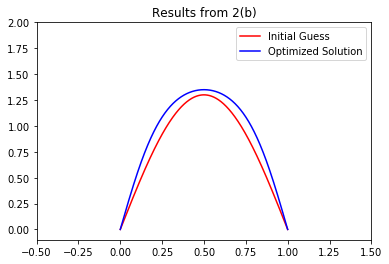

In [575]:
# Now we put it all together to get our output for 2(b)!
print("Output and graph for P2b:")

#Make initial guess vector
initial_guess = np.zeros(21)
initial_guess[0] = 1.3
initial_guess[-1] = 0
e = initial_guess[:-1]

#print optimized result
target = scipy.optimize.root(Lagrangian_grad, initial_guess).x
print(target)
e_best = target[:-1]

initial_vals = []
optimized_vals = []
x_array = np.linspace(0, 1, 800)
for x in x_array:
    initial_vals.append(y(x, e))
    optimized_vals.append(y(x, e_best))

#now plot
fig, ax = plt.subplots(1,1)
ax.plot(x_array, initial_vals, label='Initial Guess', color='red')
ax.plot(x_array, optimized_vals, label='Optimized Solution', color='blue')
ax.set_title('Results from 2(b)')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.1, 2)
ax.legend()

plt.savefig('2b_graph.png')
plt.show()

The above plot seems reasonable, so we conclude our method was successful. 

## 2c)
Now we do the same for the next initial guess:

Output and graph for P2c:
[-1.03199740e-11  7.21445497e-01  1.46230729e-11  6.89380476e-11
 -1.37524807e-13  5.00473784e-02  6.66637725e-12  3.64038173e-11
  1.92485283e-12  3.74980723e-03  2.37534455e-12  1.86859548e-11
  1.11411493e-12  2.80369431e-04  3.99055652e-13  1.17836926e-11
  3.18276440e-13  1.94822285e-05 -1.44788152e-13  5.18179452e-12
 -5.52457258e-01]


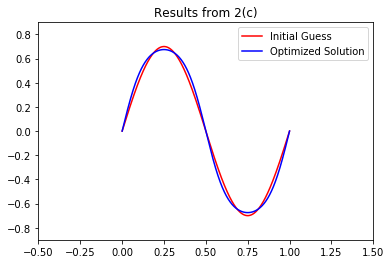

In [576]:
# Now we put it all together to get our output for 2(c)!
print("Output and graph for P2c:")

#Make initial guess vector
initial_guess = np.zeros(21)
initial_guess[1] = 0.7
initial_guess[-1] = 0
e = initial_guess[:-1]

#print optimized result
target = scipy.optimize.root(Lagrangian_grad, initial_guess).x
e_best = target[:-1]
print(target)

initial_vals = []
optimized_vals = []
x_array = np.linspace(0, 1, 800)

for x in x_array:
    initial_vals.append(y(x, e))
    optimized_vals.append(y(x, e_best))

#now plot
fig, ax = plt.subplots(1,1)
ax.plot(x_array, initial_vals, label='Initial Guess', color='red')
ax.plot(x_array, optimized_vals, label='Optimized Solution', color='blue')
ax.set_title('Results from 2(c)')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.9, 0.9)
ax.legend()

plt.savefig('2c_graph.png')
plt.show()

The above plot seems reasonable, so we conclude our method was successful. 

## 3a)

Recognizing our Schrodinger equation's similarity to the more general equation $A\vec{x} = \lambda \vec{x}$, which we know how to approach, suggests the following rewriting of the equation:

$$ H \Psi(x) = E \Psi(x) $$

where we have a Hamiltonian matrix $H = -\frac{d^2 \Psi}{dx^2} + v(x)$ that consists of the kinetic energy matrix (the first term) and the potential energy matrix (the second term). If we call $T$ the kinetic energy term and $V$ the potential energy term, then we see that $H = T + V$.

We use a second-order accurate finite-difference approximation for the first term, which gives us: 

$$ -\frac{d^2 \Psi}{dx^2} = - \frac{\Psi(x-h) - 2\Psi(x) + \Psi(x+h)}{h^2}$$

So to construct $H$ we need our two matrices $T$ and $V$ where $T$ is of the form:

$$
  \begin{align}
    T &= -\frac{1}{h^2} \begin{bmatrix}
           -2 & 1 & 0 & 0 & \cdots & 0 \\
           1 & -2 & 1 & 0 & \cdots & 0 \\
           0 & 1 & -2 & 1 & \cdots & 0 \\
           \vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
           0 & \cdots & 0 & 1 & -2 & 1 \\
           0 & \cdots & 0 & 0 & 1 & -2 \\  
         \end{bmatrix}
  \end{align}
$$

and V is of the form:

$$
  \begin{align}
    V &= \begin{bmatrix}
           v_1 & 0 & 0 & 0 & \cdots & 0 \\
           0 & v_2 & 0 & 0 & \cdots & 0 \\
           0 & 0 & v_3 & 0 & \cdots & 0 \\
           \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
           0 & \cdots & 0 & 0 & v_{n-1} & 0 \\
           0 & \cdots & 0 & 0 & 0 & v_n \\  
         \end{bmatrix}
  \end{align}
$$



The code below constructs the Hamiltonian matrix for us to use in part (a):

In [613]:
# Kinetic energy matrix 
# (*Note that, for simplicity, 
# I leave out the -1/h**2 term here and instead 
# include it in my Hamiltonian function below.)

import numpy as np
import matplotlib.pyplot as plt

grid_pts = 1921
h = 24 / (grid_pts - 1)
x_array = np.linspace(-12, 12, grid_pts)

def T_matrix(grid_pts):
    
    G_adjusted = grid_pts - 2
    
    T = np.zeros((G_adjusted, G_adjusted))
    np.fill_diagonal(T, -2)
    np.fill_diagonal(T[1:], 1)
    np.fill_diagonal(T[:,1:], 1)
    
    return T


In [614]:
# Various potentials to use:
def v_1(x_array):
    return abs(x_array)

def v_2(x_array):
    target = 12*(x_array/10)**4 - x_array**2/18 + x_array/8 + 13/10
    return target

def v_3(x_array):
    return 8 * abs(abs(abs(x_array) - 1) - 1)

    

In [615]:
# construct V matrix
def V_matrix(grid_pts, v_func, x_array):
    
    G_adjusted = grid_pts - 2
    
    V = np.zeros((G_adjusted, G_adjusted))
    np.fill_diagonal(V, v_func(x_array[1:G_adjusted]))
    
    return V


In [616]:
# construct Hamiltonian
def H_matrix(T, V, h):
    return -T/(h**2) + V

# define function to produce eigenmode that we graph
def eigenmode(eigvec, eigval):
    target = 3 * eigvec + eigval
    return target

Running the code below outputs tables of the  five lowest eigenvalues and the figures with corresponding eigenmodes for the three potentials we're given:

(0, 6)

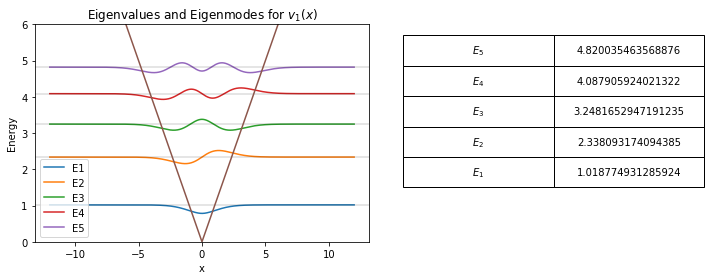

In [617]:

T = T_matrix(grid_pts)
V = V_matrix(grid_pts, v_1, x_array)
H = H_matrix(T, V, h)


eigval,eigvec = np.linalg.eig(H)
lowest_indices = np.argsort(eigval)[0:5]

fig, ax = plt.subplots()
counter = 0
for idx in lowest_indices:
    counter += 1
    eigvector = eigvec[:, idx]
    eigvector = np.append(eigvector, 0)
    eigvector = np.insert(eigvector, 0, 0)
    
    eigMODE = eigenmode(eigvector, eigval[idx])

    ax.plot(x_array, eigMODE, label="E" + str(counter))
    plt.axhline(eigMODE[0], color='black', linewidth=0.2)

ax.plot(x_array, v_1(x_array))
ax.legend()
    
eigval_data = [['$E_5$', eigval[lowest_indices[4]]],
               ['$E_4$', eigval[lowest_indices[3]]],
               ['$E_3$', eigval[lowest_indices[2]]],
               ['$E_2$', eigval[lowest_indices[1]]],
               ['$E_1$', eigval[lowest_indices[0]]]]
eigval_table = ax.table(cellText=eigval_data, bbox=[1.1,0.25,0.9,0.7], cellLoc = 'center', loc='right')
ax.set_title('Eigenvalues and Eigenmodes for $v_1(x)$')
ax.set_xlabel('x')
ax.set_ylabel('Energy')
ax.set_ylim(0,6)

(0, 3)

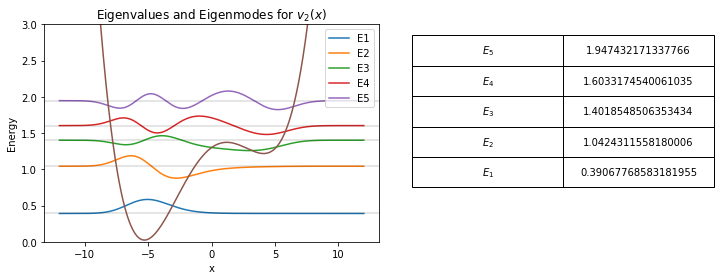

In [618]:
T = T_matrix(grid_pts)
V = V_matrix(grid_pts, v_2, x_array)
H = H_matrix(T, V, h)


eigval,eigvec = np.linalg.eig(H)
lowest_indices = np.argsort(eigval)[0:5]

fig, ax = plt.subplots()
counter = 0
for idx in lowest_indices:
    counter += 1
    eigvector = eigvec[:, idx]
    eigvector = np.append(eigvector, 0)
    eigvector = np.insert(eigvector, 0, 0)
    
    eigMODE = eigenmode(eigvector, eigval[idx])

    ax.plot(x_array, eigMODE, label="E" + str(counter))
    plt.axhline(eigMODE[0], color='black', linewidth=0.2)

ax.plot(x_array, v_2(x_array))
ax.legend()
    
eigval_data = [['$E_5$', eigval[lowest_indices[4]]],
               ['$E_4$', eigval[lowest_indices[3]]],
               ['$E_3$', eigval[lowest_indices[2]]],
               ['$E_2$', eigval[lowest_indices[1]]],
               ['$E_1$', eigval[lowest_indices[0]]]]
eigval_table = ax.table(cellText=eigval_data, bbox=[1.1,0.25,0.9,0.7], cellLoc = 'center', loc='right')
ax.set_title('Eigenvalues and Eigenmodes for $v_2(x)$')
ax.set_xlabel('x')
ax.set_ylabel('Energy')
ax.set_ylim(0, 3)



(0, 16)

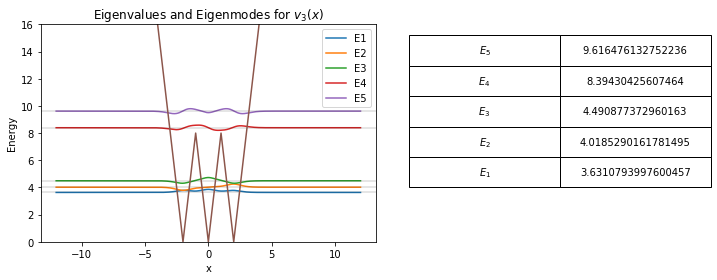

In [619]:
T = T_matrix(grid_pts)
V = V_matrix(grid_pts, v_3, x_array)
H = H_matrix(T, V, h)


eigval,eigvec = np.linalg.eig(H)
lowest_indices = np.argsort(eigval)[0:5]

fig, ax = plt.subplots()
counter = 0
for idx in lowest_indices:
    counter += 1
    eigvector = eigvec[:, idx]
    eigvector = np.append(eigvector, 0)
    eigvector = np.insert(eigvector, 0, 0)
    
    eigMODE = eigenmode(eigvector, eigval[idx])

    ax.plot(x_array, eigMODE, label="E" + str(counter))
    plt.axhline(eigMODE[0], color='black', linewidth=0.2)

ax.plot(x_array, v_3(x_array))
ax.legend()
    
    
eigval_data = [['$E_5$', eigval[lowest_indices[4]]],
               ['$E_4$', eigval[lowest_indices[3]]],
               ['$E_3$', eigval[lowest_indices[2]]],
               ['$E_2$', eigval[lowest_indices[1]]],
               ['$E_1$', eigval[lowest_indices[0]]]]
eigval_table = ax.table(cellText=eigval_data, bbox=[1.1,0.25,0.9,0.7], cellLoc = 'center', loc='right')
ax.set_title('Eigenvalues and Eigenmodes for $v_3(x)$')
ax.set_xlabel('x')
ax.set_ylabel('Energy')
ax.set_ylim(0,16)

## 3b)
The code below computes the desired probabilities (one for each eienmode in $v_2$). 

In [620]:
T = T_matrix(grid_pts)
V = V_matrix(grid_pts, v_2, x_array)
H = H_matrix(T, V, h)


eigval,eigvec = np.linalg.eig(H)
lowest_indices = np.argsort(eigval)[0:5]

counter = 0
for idx in lowest_indices:
    counter += 1
    eigvector = eigvec[:, idx]
    eigvector = np.append(eigvector, 0)
    eigvector = np.insert(eigvector, 0, 0)
    
    eigMODE = eigenmode(eigvector, eigval[idx])
    
    if counter == 1:
        eigMODE_1 = eigvector
#         print("stored 1")
        
    if counter == 2:
        eigMODE_2 = eigvector
#         print("stored 2")
        
    if counter == 3:
        eigMODE_3 = eigvector
#         print("stored 3")
        
    if counter == 4:
        eigMODE_4 = eigvector
#         print("stored 4")
        
    if counter == 5:
        eigMODE_5 = eigvector
#         print("stored 5")
        
    if counter == 6:
        print("went too far!")

In [621]:
grid_pts = 1921
h = 24 / (grid_pts - 1)


def Simpson(eigmode, A, B):
    sum = 0
    deltax = (A-B)/len(eigmode)
    x = len(eigmode)//2
    for i in range(x):
        a = 2*i - 2
        b = 2*i - 1
        c = 2*i
        temp_target = eigmode[a] + 4*eigmode[b] + eigmode[c]
        sum = sum + temp_target     
    S = deltax/3 * sum
    return S


start = 960
end = 1440

new_eigmode = eigMODE_1[start : end + 1]
num = Simpson(new_eigmode**2, 0, 6)
denom = Simpson(eigMODE_1**2, -12, 12)
print("Probability 1:",num/denom)

new_eigmode = eigMODE_2[start : end + 1]
num = Simpson(new_eigmode**2, 0, 6)
denom = Simpson(eigMODE_2**2, -12, 12)
print("Probability 2:",num/denom)

new_eigmode = eigMODE_3[start : end + 1]
num = Simpson(new_eigmode**2, 0, 6)
denom = Simpson(eigMODE_3**2, -12, 12)
print("Probability 3:",num/denom)

new_eigmode = eigMODE_4[start : end + 1]
num = Simpson(new_eigmode**2, 0, 6)
denom = Simpson(eigMODE_4**2, -12, 12)
print("Probability 4:",num/denom)

new_eigmode = eigMODE_5[start : end + 1]
num = Simpson(new_eigmode**2, 0, 6)
denom = Simpson(eigMODE_5**2, -12, 12)
print("Probability 5:",num/denom)


Probability 1: 0.0003172817329299456
Probability 2: 0.03045273373378935
Probability 3: 0.7863265277291192
Probability 4: 0.3994962459853704
Probability 5: 0.531445917387001


So our probabilities (corresponding to the five eigenmodes, respectively) that the particle is in the region $x \in [0,6]$  are: 0.03%, 3%, 79%, 40%, and 53%. 

For this HW, I worked at different points with Kaela Nelson, Michael Downs, and Kyra Ballard.